In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#bring in the six packs
df_train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')

In [3]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df_train.loc[df_train['Street'] == 'Pave']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df_train.loc[df_train['Street'] != 'Pave']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
52,53,90,RM,110.0,8472,Grvl,NaN,IR2,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,110000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
582,583,90,RL,81.0,11841,Grvl,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,118500
812,813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,Shed,54,6,2010,WD,Alloca,55993
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1184,1185,20,RL,50.0,35133,Grvl,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,186700


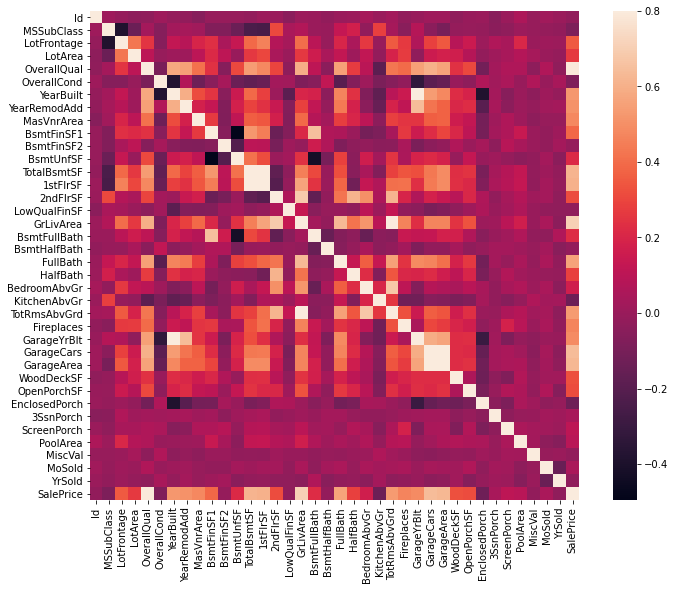

In [6]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [7]:
x_list = [1,2,3,4,4,4]
print(x_list)
print(set(x_list))

[1, 2, 3, 4, 4, 4]
{1, 2, 3, 4}


In [8]:
quantitative_df = df_train._get_numeric_data()
quantitative_list = set(quantitative_df.columns)
qualitative_list = set(df_train.columns) - (quantitative_list)
qualitative_df = df_train[qualitative_list]

In [9]:
quantitative_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [10]:
qualitative_df

,LandContour,MiscFeature,Foundation,ExterQual,Alley,CentralAir,Condition2,LotShape,FireplaceQu,Exterior2nd,...,MSZoning,Neighborhood,HeatingQC,BsmtCond,Street,Electrical,GarageCond,RoofStyle,Functional,PavedDrive
0,Lvl,NaN,PConc,Gd,NaN,Y,Norm,Reg,NaN,VinylSd,...,RL,CollgCr,Ex,TA,Pave,SBrkr,TA,Gable,Typ,Y
1,Lvl,NaN,CBlock,TA,NaN,Y,Norm,Reg,TA,MetalSd,...,RL,Veenker,Ex,TA,Pave,SBrkr,TA,Gable,Typ,Y
2,Lvl,NaN,PConc,Gd,NaN,Y,Norm,IR1,TA,VinylSd,...,RL,CollgCr,Ex,TA,Pave,SBrkr,TA,Gable,Typ,Y
3,Lvl,NaN,BrkTil,TA,NaN,Y,Norm,IR1,Gd,Wd Shng,...,RL,Crawfor,Gd,Gd,Pave,SBrkr,TA,Gable,Typ,Y
4,Lvl,NaN,PConc,Gd,NaN,Y,Norm,IR1,TA,VinylSd,...,RL,NoRidge,Ex,TA,Pave,SBrkr,TA,Gable,Typ,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Lvl,NaN,PConc,TA,NaN,Y,Norm,Reg,TA,VinylSd,...,RL,Gilbert,Ex,TA,Pave,SBrkr,TA,Gable,Typ,Y
1456,Lvl,NaN,CBlock,TA,NaN,Y,Norm,Reg,TA,Plywood,...,RL,NWAmes,TA,TA,Pave,SBrkr,TA,Gable,Min1,Y
1457,Lvl,Shed,Stone,Ex,NaN,Y,Norm,Reg,Gd,CmentBd,...,RL,Crawfor,Ex,Gd,Pave,SBrkr,TA,Gable,Typ,Y
1458,Lvl,NaN,CBlock,TA,NaN,Y,Norm,Reg,NaN,MetalSd,...,RL,NAmes,Gd,TA,Pave,FuseA,TA,Hip,Typ,Y


In [29]:
print(qualitative_df.columns)

Index(['LandContour', 'MiscFeature', 'Foundation', 'ExterQual', 'Alley',
       'CentralAir', 'Condition2', 'LotShape', 'FireplaceQu', 'Exterior2nd',
       'BldgType', 'GarageFinish', 'LandSlope', 'SaleCondition', 'Heating',
       'HouseStyle', 'GarageQual', 'Fence', 'MasVnrType', 'BsmtExposure',
       'RoofMatl', 'ExterCond', 'Condition1', 'KitchenQual', 'BsmtQual',
       'BsmtFinType1', 'SaleType', 'Utilities', 'LotConfig', 'BsmtFinType2',
       'PoolQC', 'GarageType', 'Exterior1st', 'MSZoning', 'Neighborhood',
       'HeatingQC', 'BsmtCond', 'Street', 'Electrical', 'GarageCond',
       'RoofStyle', 'Functional', 'PavedDrive'],
      dtype='object')


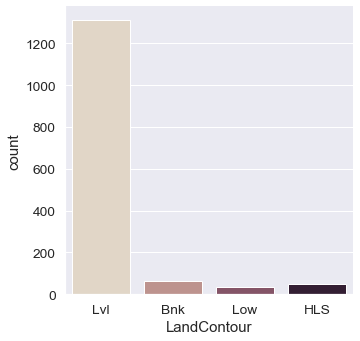

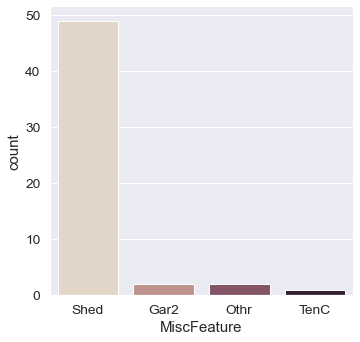

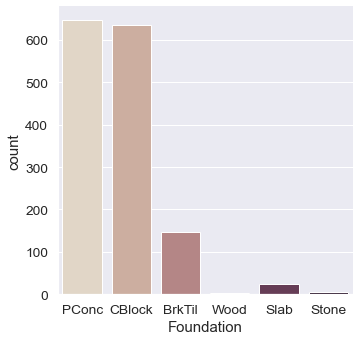

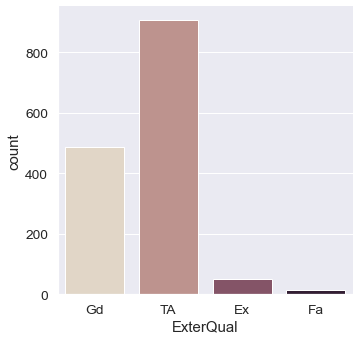

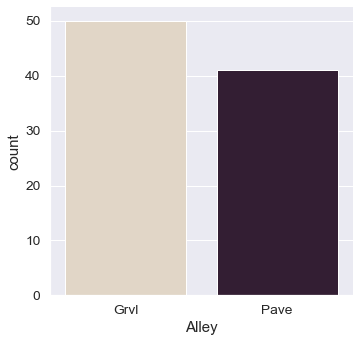

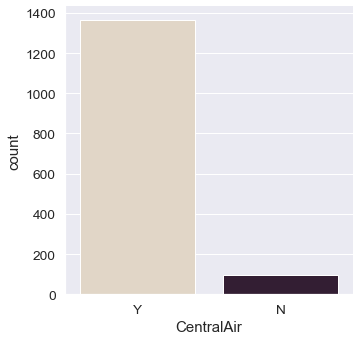

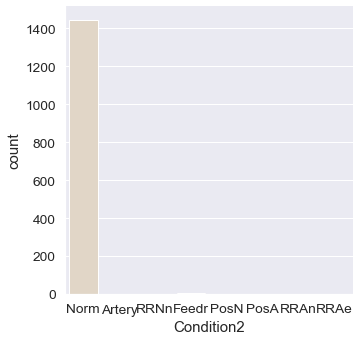

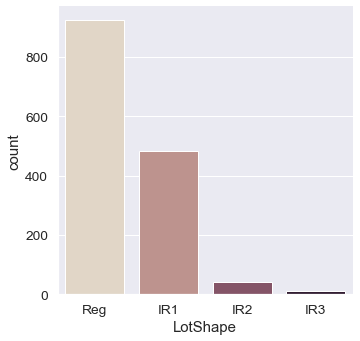

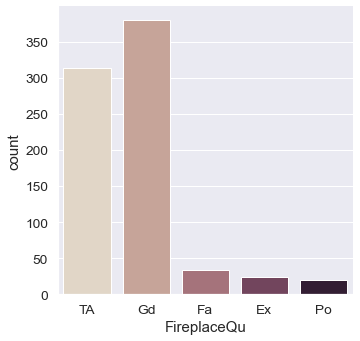

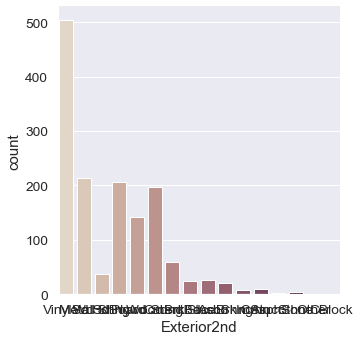

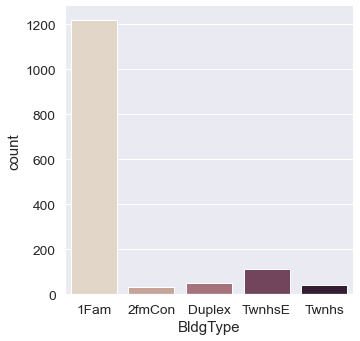

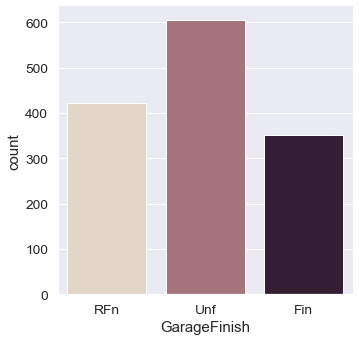

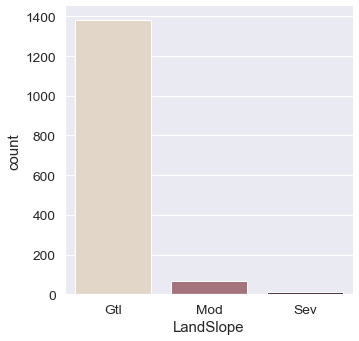

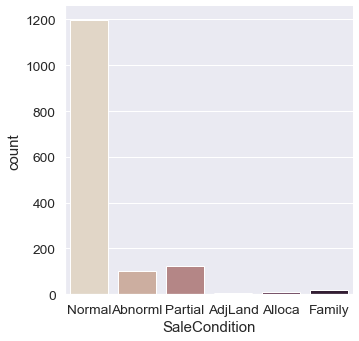

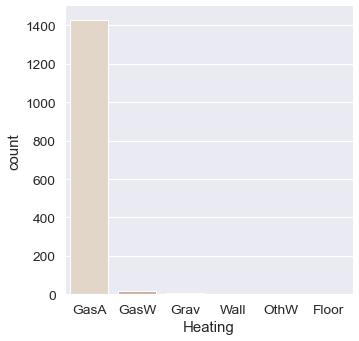

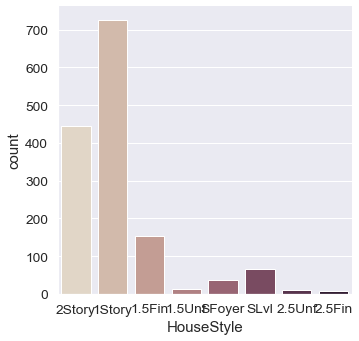

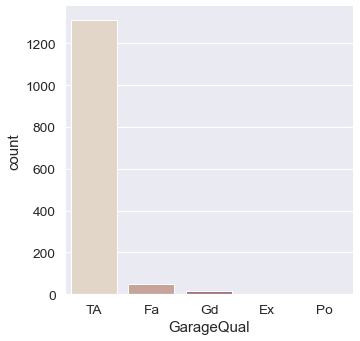

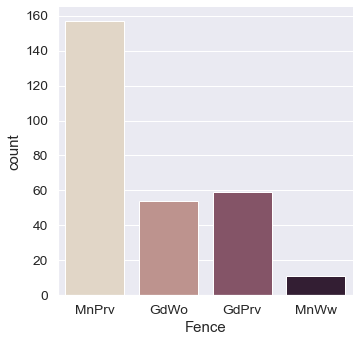

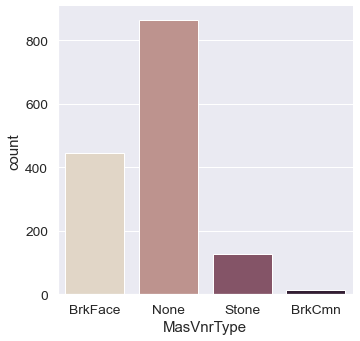

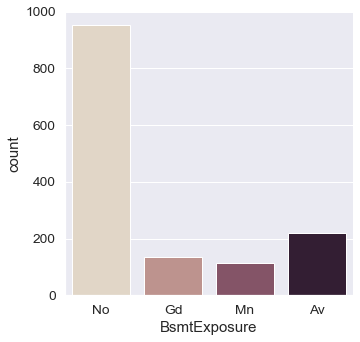

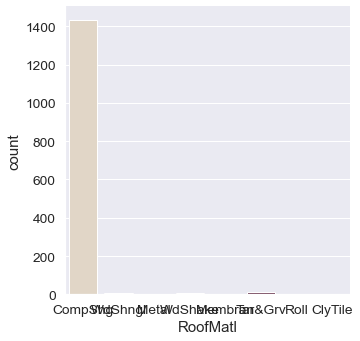

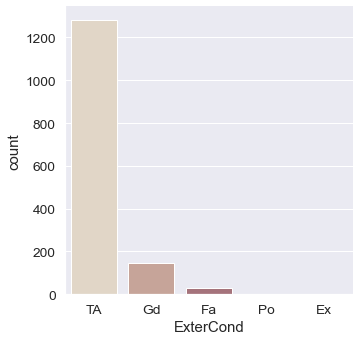

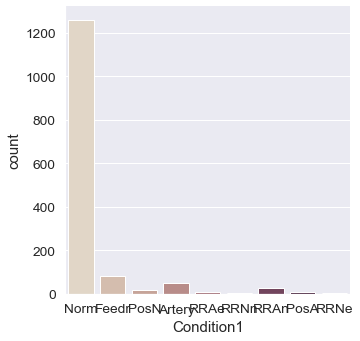

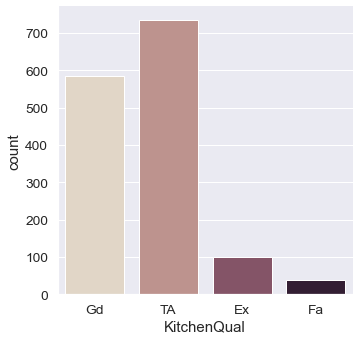

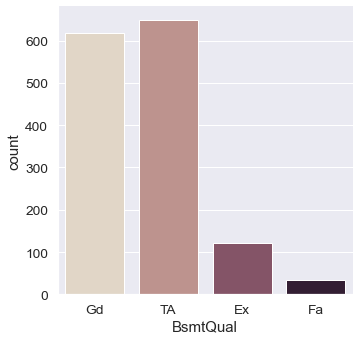

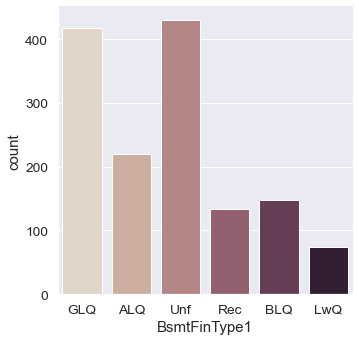

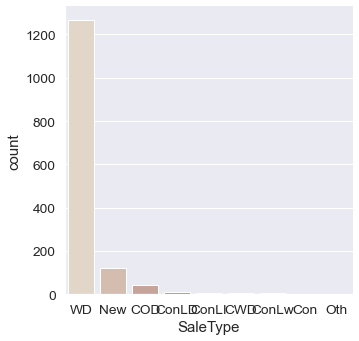

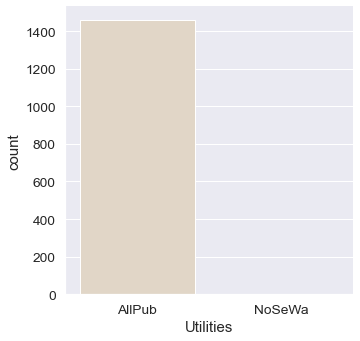

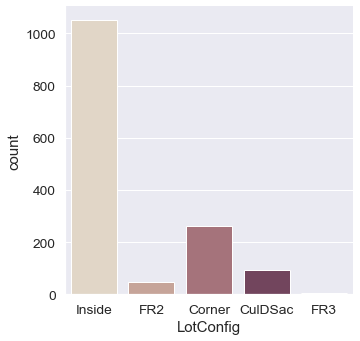

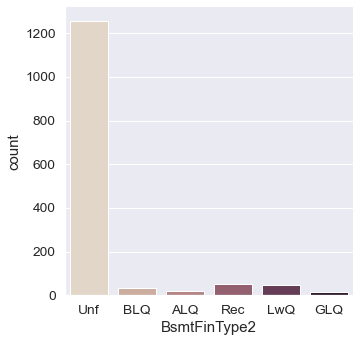

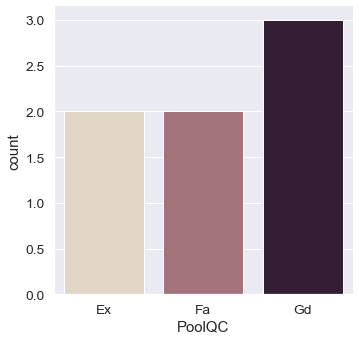

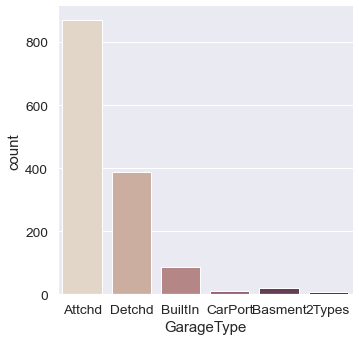

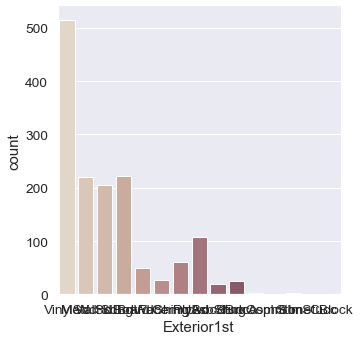

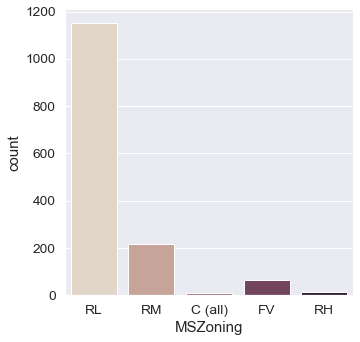

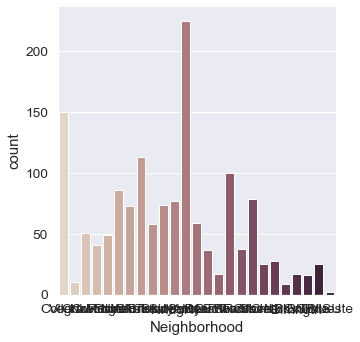

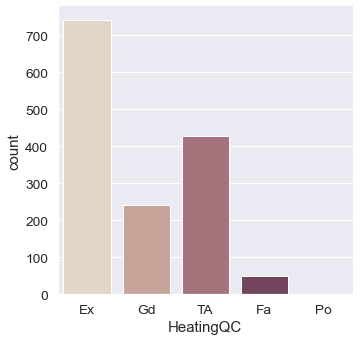

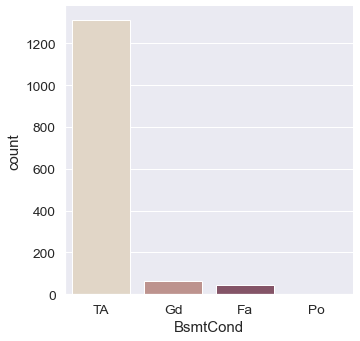

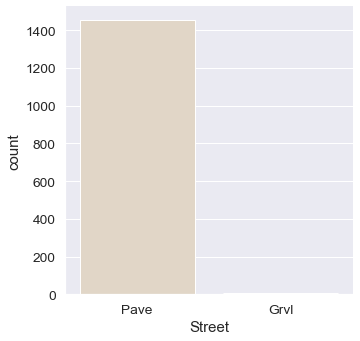

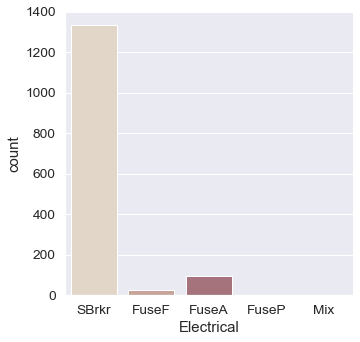

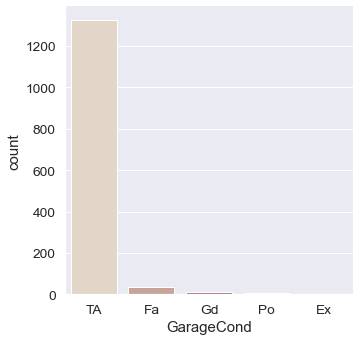

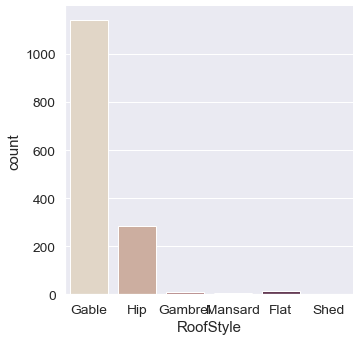

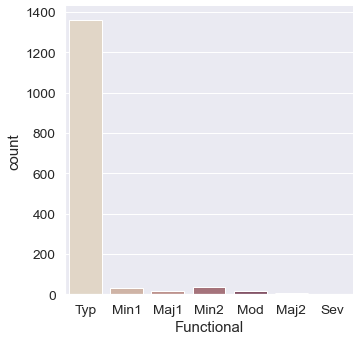

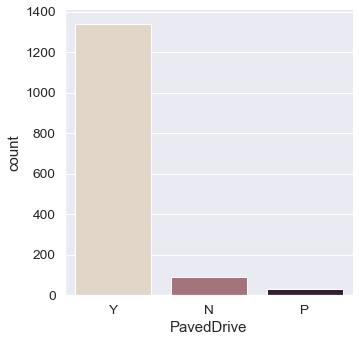

In [27]:
# i = 0

# for column in qualitative_list:
#     sns_plot = sns.catplot(x=column, kind="count", palette="ch:.25", data=df_train)
#     sns_plot.savefig("count"+str(i)+".png")
#     i += 1

In [12]:
Bsmt_Gd_df = df_train.loc[df_train["BsmtQual"] == "Gd"]
Bsmt_TA_df = df_train.loc[df_train["BsmtQual"] == "TA"]

In [13]:
Bsmt_Gd_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000


In [14]:
Bsmt_TA_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,1446,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,129000
1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,157900
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


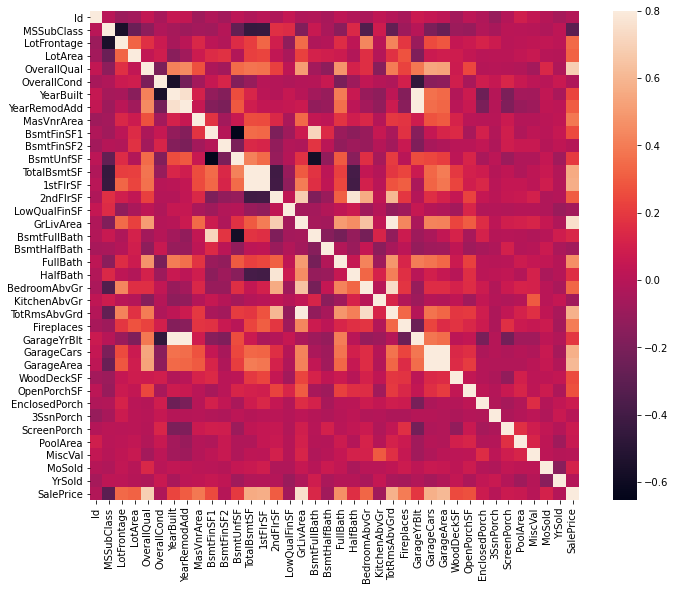

In [15]:
Bsmt_Gd_corrmat = Bsmt_Gd_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(Bsmt_Gd_corrmat, vmax=.8, square=True)

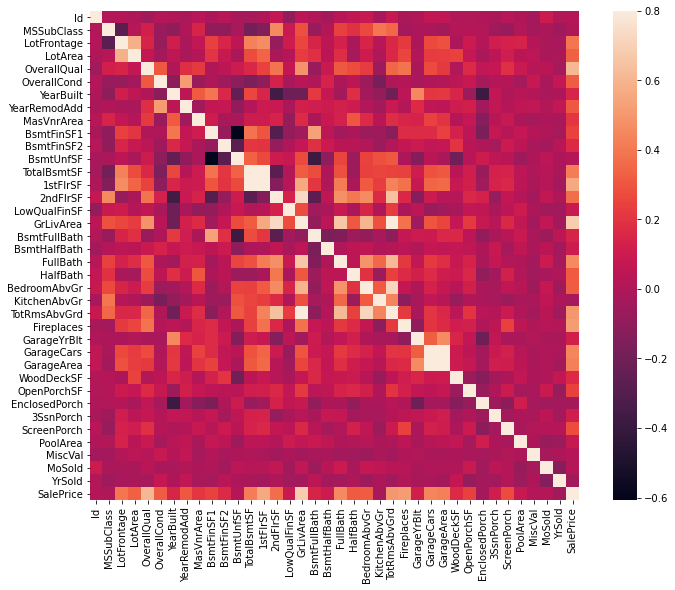

In [16]:
Bsmt_TA_corrmat = Bsmt_TA_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(Bsmt_TA_corrmat, vmax=.8, square=True)

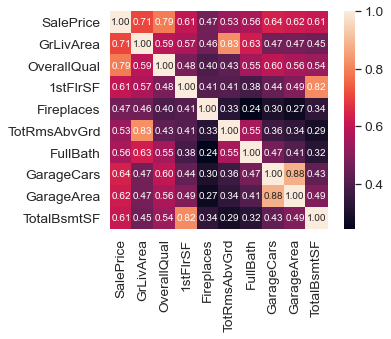

In [17]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = Bsmt_TA_corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

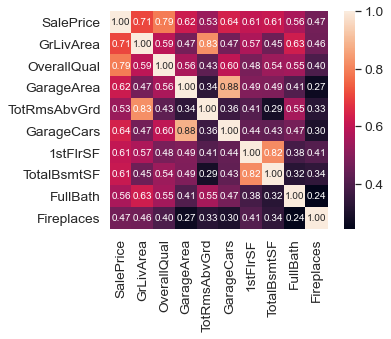

In [18]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = Bsmt_Gd_corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [19]:
df_train[cols]

,SalePrice,GrLivArea,OverallQual,GarageArea,TotRmsAbvGrd,GarageCars,1stFlrSF,TotalBsmtSF,FullBath,Fireplaces
0,208500,1710,7,548,8,2,856,856,2,0
1,181500,1262,6,460,6,2,1262,1262,2,1
2,223500,1786,7,608,6,2,920,920,2,1
3,140000,1717,7,642,7,3,961,756,1,1
4,250000,2198,8,836,9,3,1145,1145,2,1
...,...,...,...,...,...,...,...,...,...,...
1455,175000,1647,6,460,7,2,953,953,2,1
1456,210000,2073,6,500,7,2,2073,1542,2,2
1457,266500,2340,7,252,9,1,1188,1152,2,2
1458,142125,1078,5,240,5,1,1078,1078,1,0


In [20]:
cm

array([[1.        , 0.70862448, 0.7909816 , 0.62343144, 0.53372316,
        0.6404092 , 0.60585218, 0.61358055, 0.56066376, 0.46692884],
       [0.70862448, 1.        , 0.59300743, 0.46899748, 0.82548937,
        0.46724742, 0.56602397, 0.4548682 , 0.63001165, 0.46167913],
       [0.7909816 , 0.59300743, 1.        , 0.56202176, 0.42745234,
        0.60067072, 0.47622383, 0.5378085 , 0.55059971, 0.39676504],
       [0.62343144, 0.46899748, 0.56202176, 1.        , 0.33782212,
        0.88247541, 0.48978165, 0.48666546, 0.40565621, 0.26914124],
       [0.53372316, 0.82548937, 0.42745234, 0.33782212, 1.        ,
        0.36228857, 0.40951598, 0.28557256, 0.55478425, 0.32611448],
       [0.6404092 , 0.46724742, 0.60067072, 0.88247541, 0.36228857,
        1.        , 0.43931681, 0.43458483, 0.46967204, 0.30078877],
       [0.60585218, 0.56602397, 0.47622383, 0.48978165, 0.40951598,
        0.43931681, 1.        , 0.81952998, 0.38063749, 0.41053108],
       [0.61358055, 0.4548682 , 0.5378085

In [21]:
cm = df_train[cols].corr()

In [22]:
cm

,SalePrice,GrLivArea,OverallQual,GarageArea,TotRmsAbvGrd,GarageCars,1stFlrSF,TotalBsmtSF,FullBath,Fireplaces
SalePrice,1.000000,0.708624,0.790982,0.623431,0.533723,0.640409,0.605852,0.613581,0.560664,0.466929
GrLivArea,0.708624,1.000000,0.593007,0.468997,0.825489,0.467247,0.566024,0.454868,0.630012,0.461679
OverallQual,0.790982,0.593007,1.000000,0.562022,0.427452,0.600671,0.476224,0.537808,0.550600,0.396765
GarageArea,0.623431,0.468997,0.562022,1.000000,0.337822,0.882475,0.489782,0.486665,0.405656,0.269141
TotRmsAbvGrd,0.533723,0.825489,0.427452,0.337822,1.000000,0.362289,0.409516,0.285573,0.554784,0.326114
GarageCars,0.640409,0.467247,0.600671,0.882475,0.362289,1.000000,0.439317,0.434585,0.469672,0.300789
1stFlrSF,0.605852,0.566024,0.476224,0.489782,0.409516,0.439317,1.000000,0.819530,0.380637,0.410531
TotalBsmtSF,0.613581,0.454868,0.537808,0.486665,0.285573,0.434585,0.819530,1.000000,0.323722,0.339519
FullBath,0.560664,0.630012,0.550600,0.405656,0.554784,0.469672,0.380637,0.323722,1.000000,0.243671
Fireplaces,0.466929,0.461679,0.396765,0.269141,0.326114,0.300789,0.410531,0.339519,0.243671,1.000000


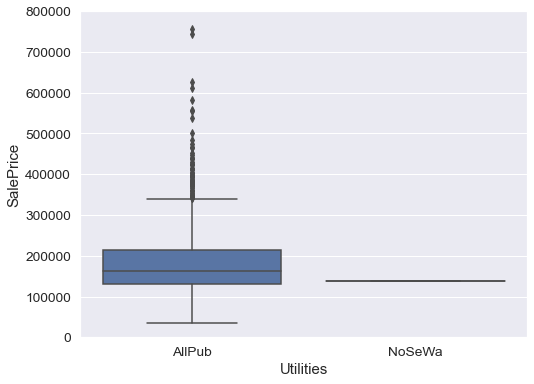

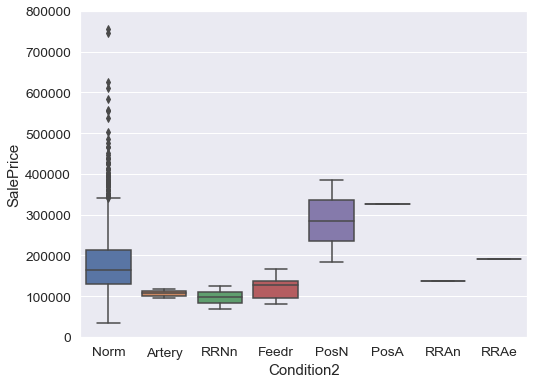

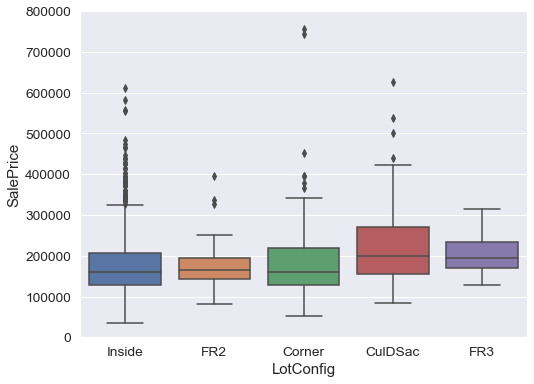

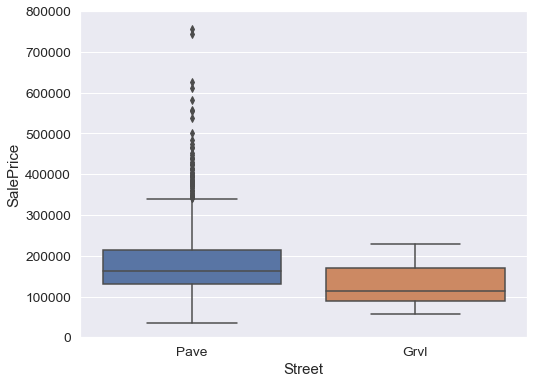

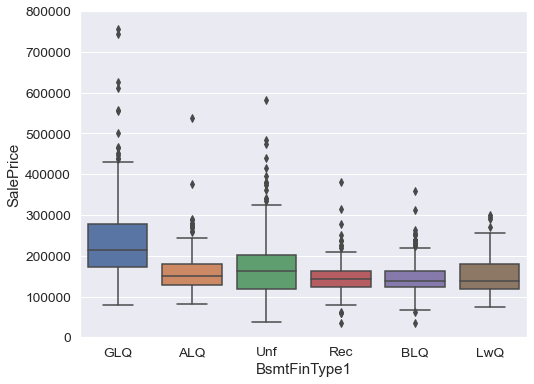

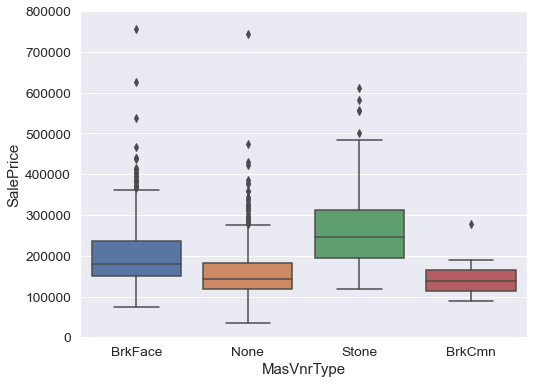

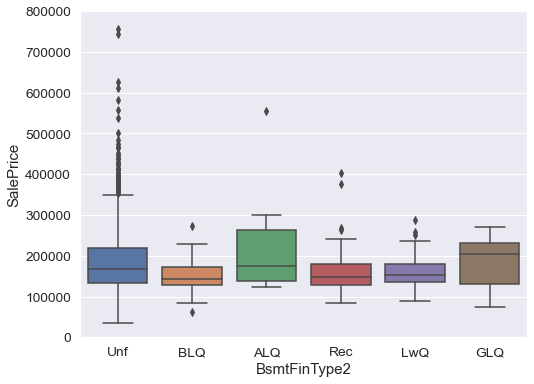

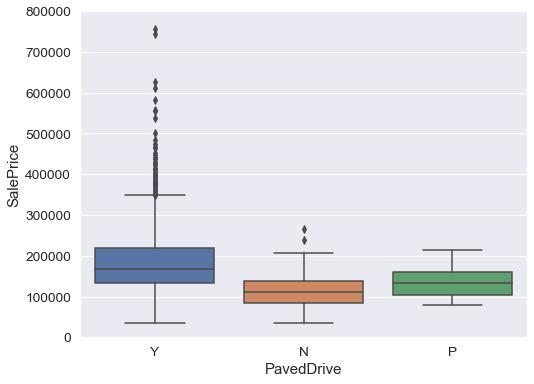

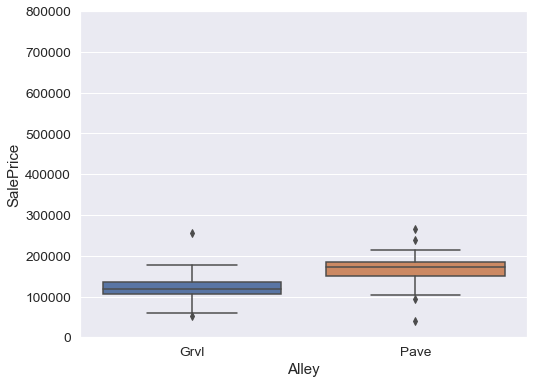

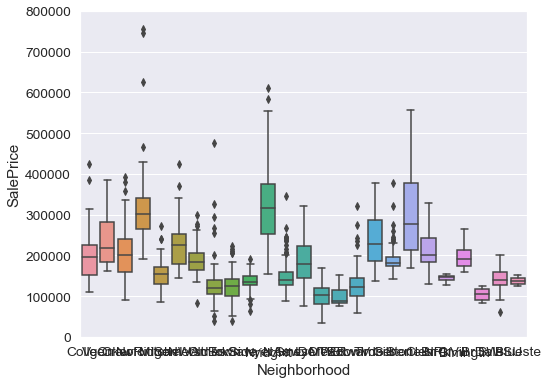

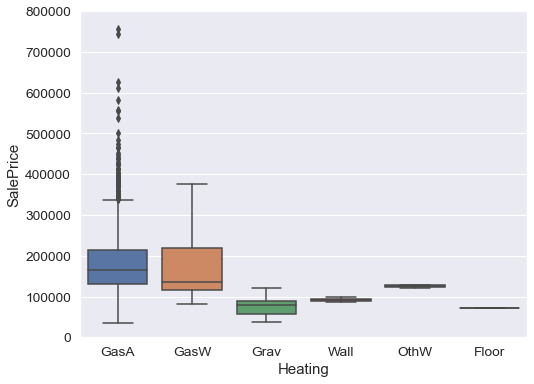

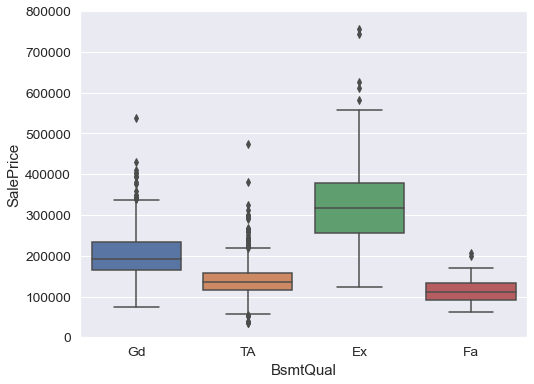

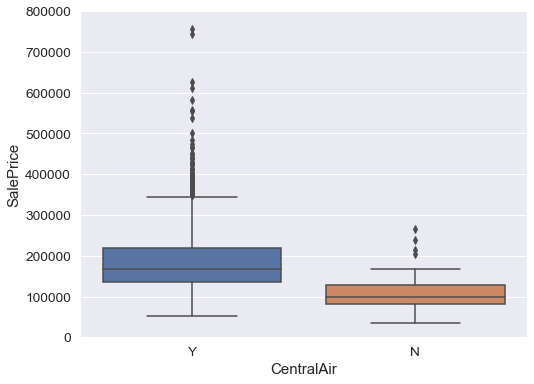

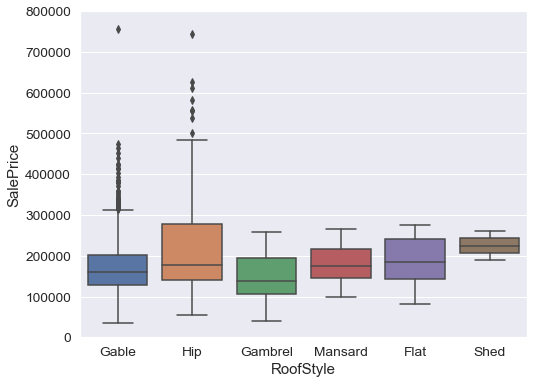

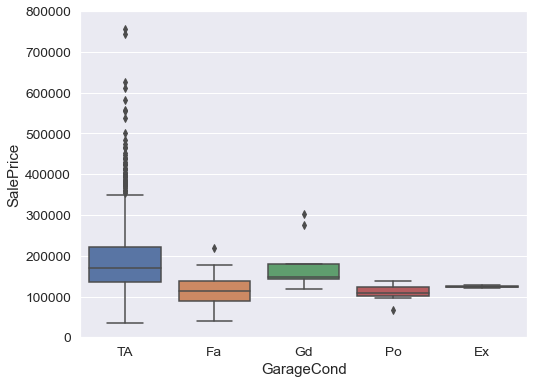

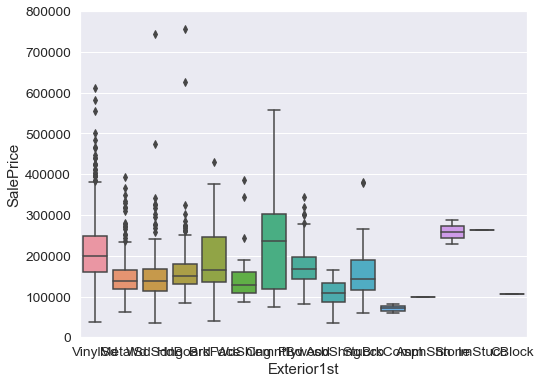

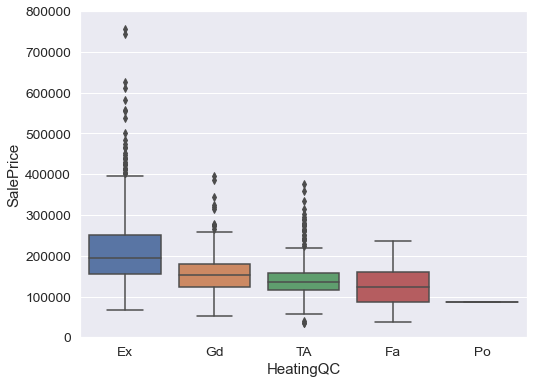

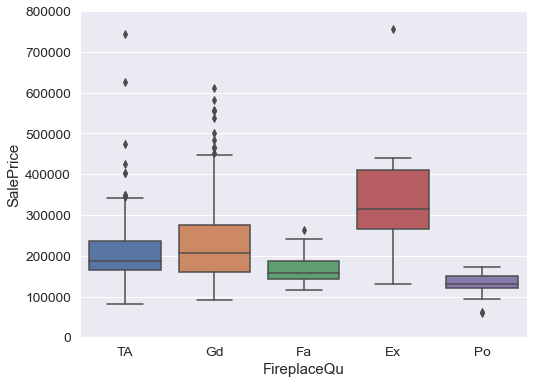

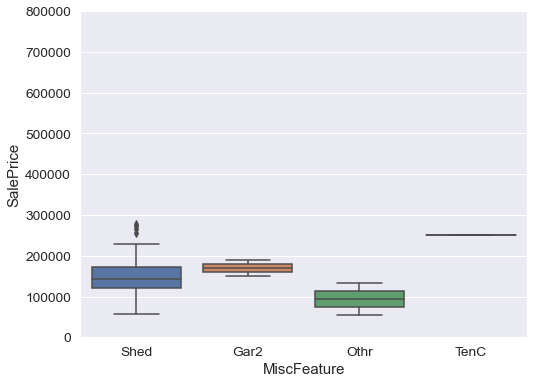

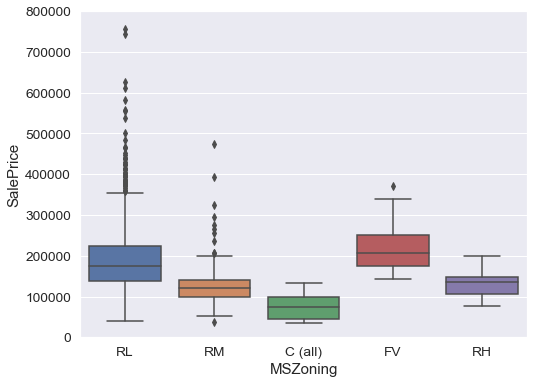

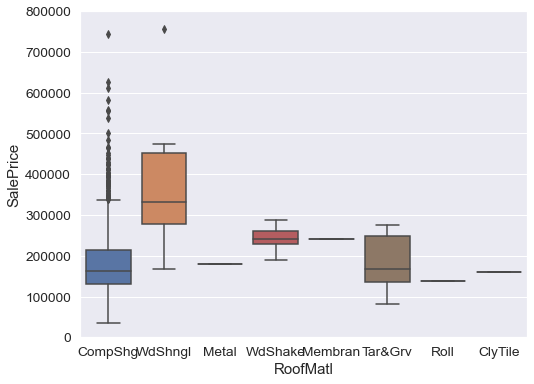

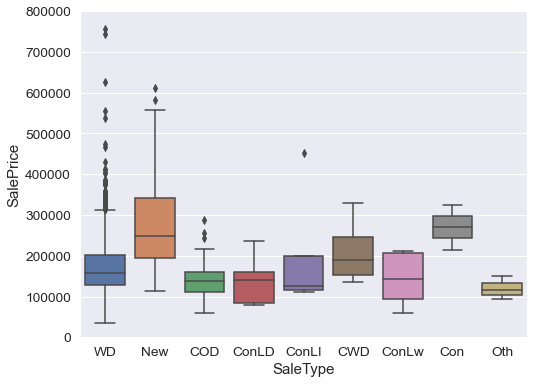

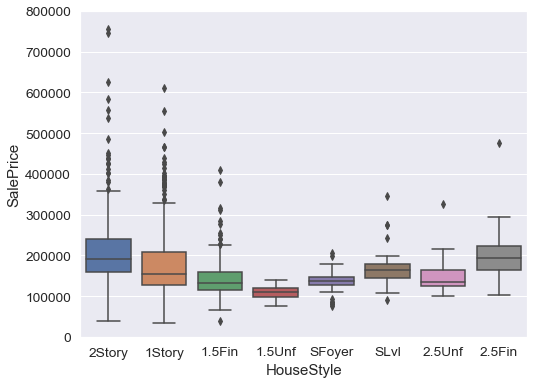

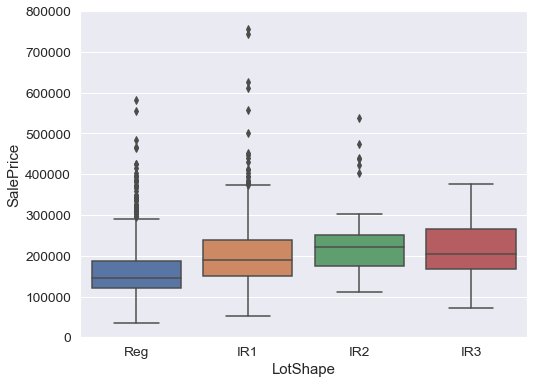

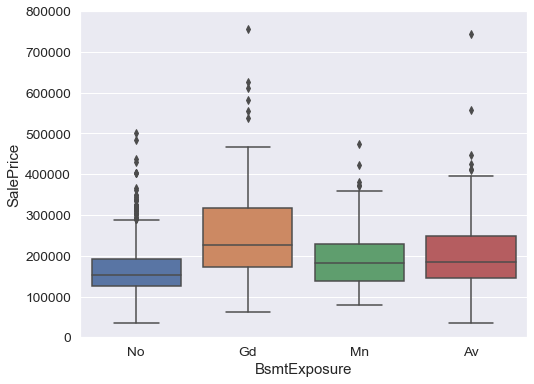

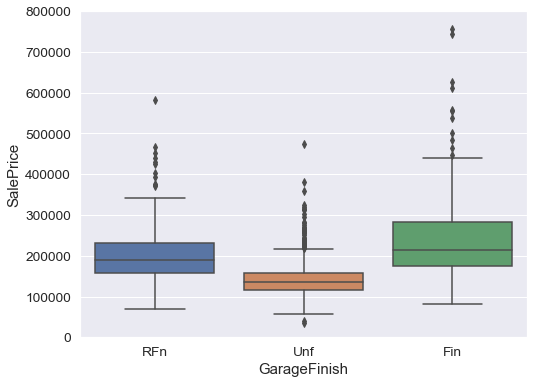

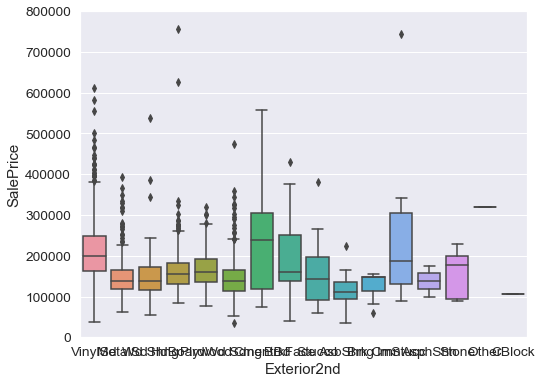

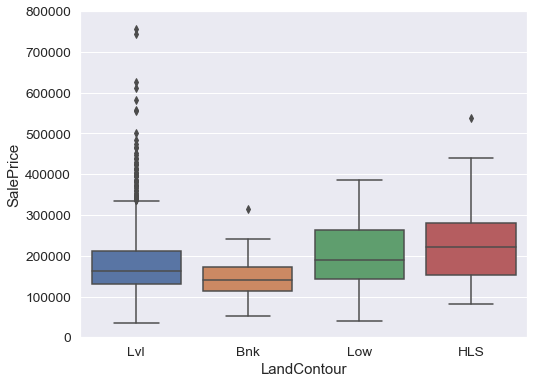

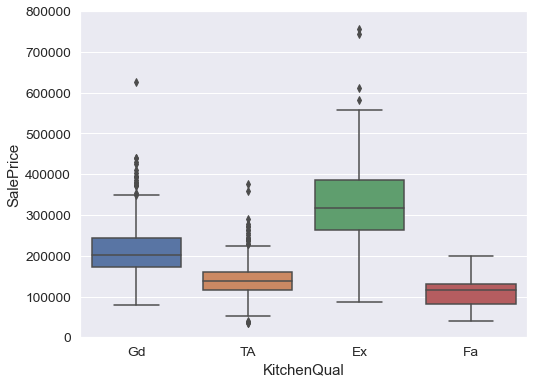

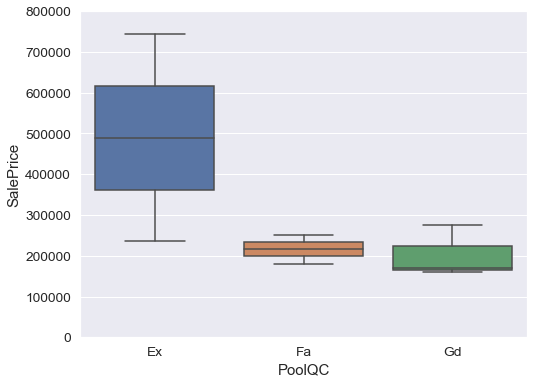

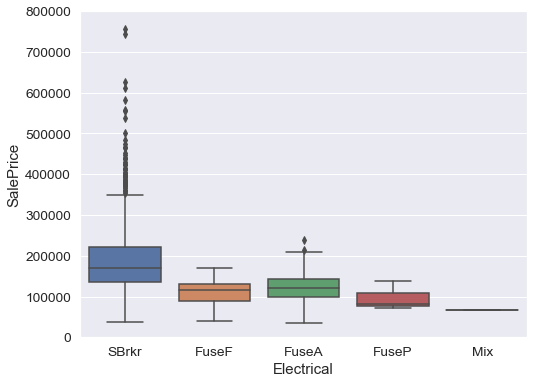

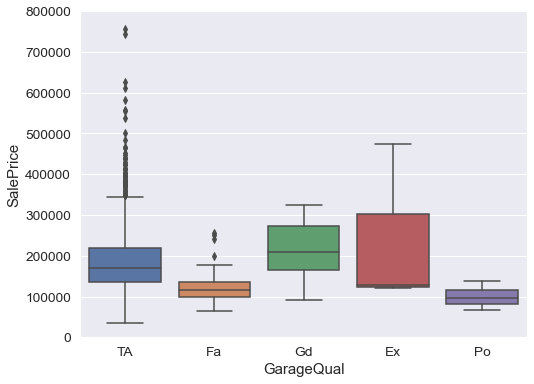

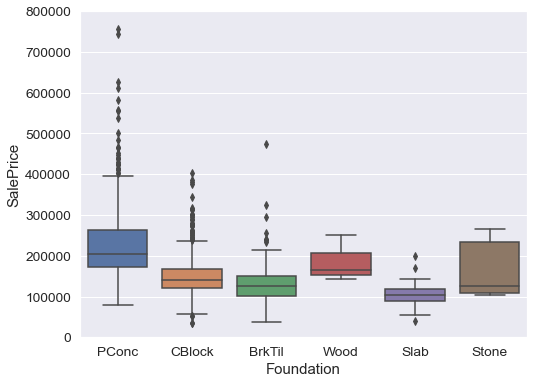

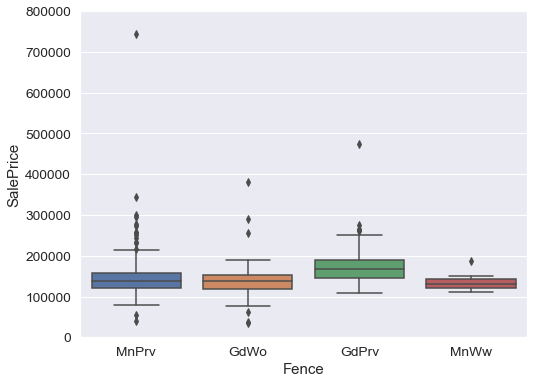

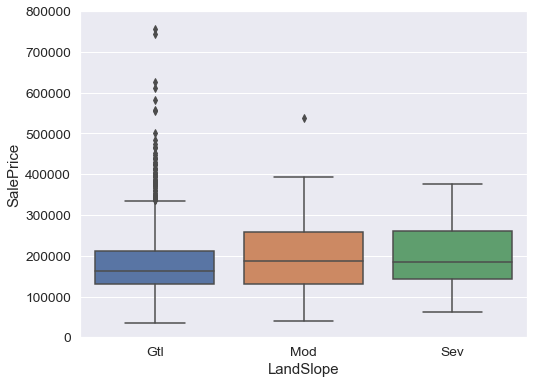

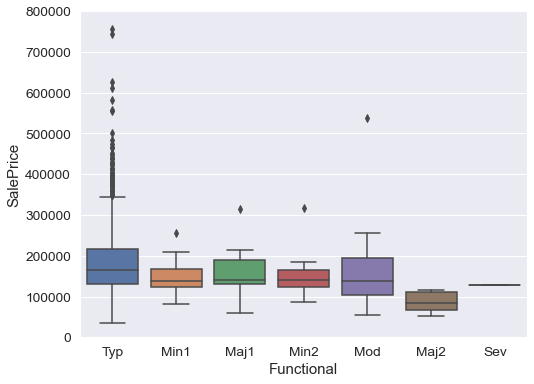

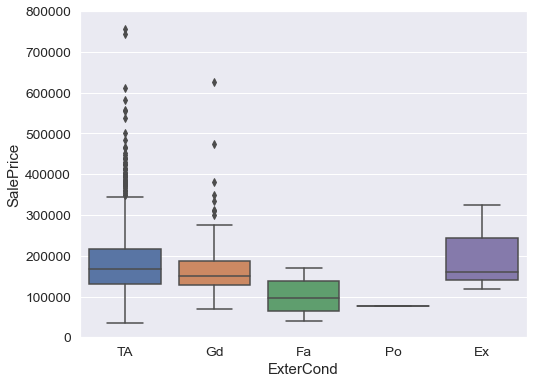

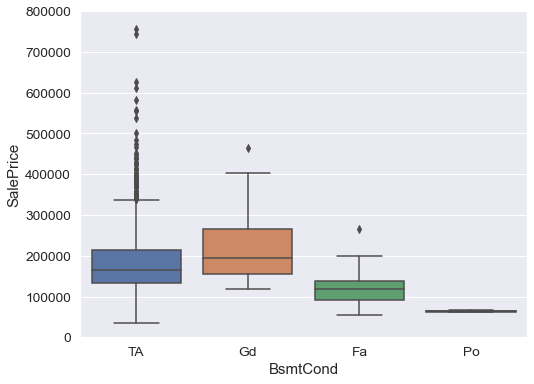

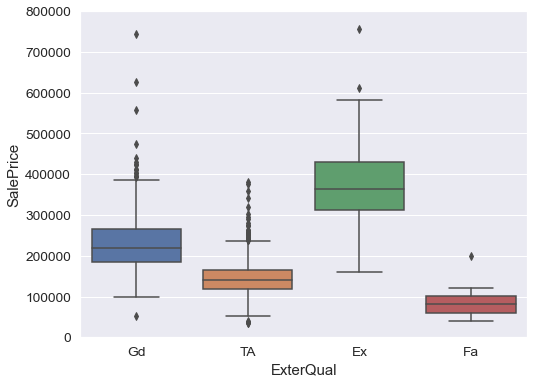

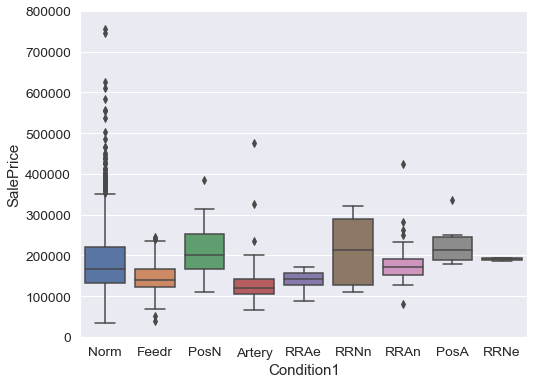

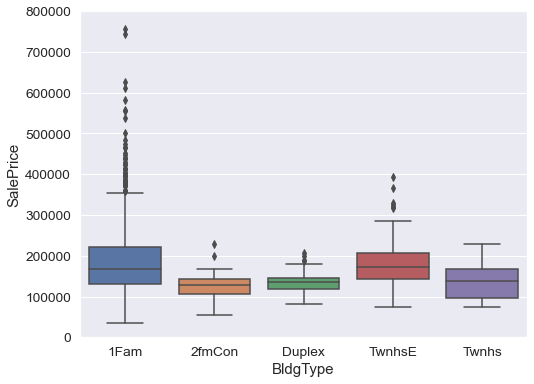

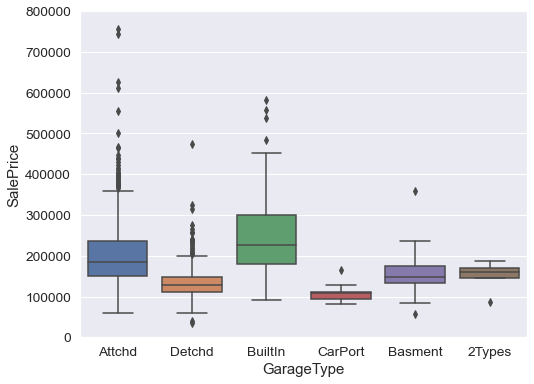

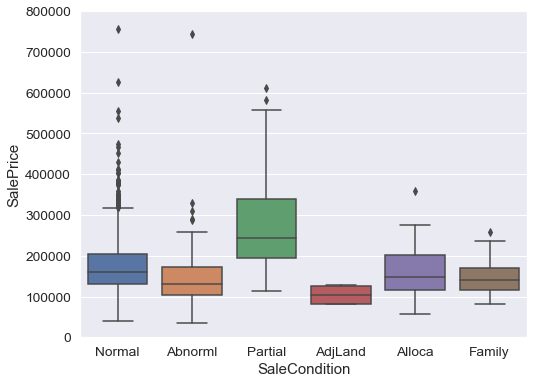

In [23]:
#box plot overallqual/saleprice
for var in qualitative_list:
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);